In [2]:
# Importa la librería pandas
import pandas as pd

# Define la ruta al archivo CSV
csv_file = r'C:\Users\Oscar\Downloads\Datos_Actividad3.csv'  # Asegúrate de añadir la extensión .csv al final de la ruta si tu archivo es un CSV

# Lee el archivo CSV
df = pd.read_csv(csv_file)

# Muestra las primeras 5 filas del dataframe
df.head()


,Unnamed: 0,ReviewText,Date,Rating,ProductCode
0,1,NaN,NaN,NaN,NaN
1,2,"I purchased the 65"" version to be used in my l...","March 31, 2021",5.0,Samsung
2,3,I don't like watching TV. I have DISH but I st...,"April 16, 2023",5.0,Samsung
3,4,I gave it 4 stars as it's a fantastic quality ...,"September 29, 2022",4.0,Samsung
4,5,PROS: The picture of this QLED (Q80A) is as go...,"February 27, 2022",4.0,Samsung


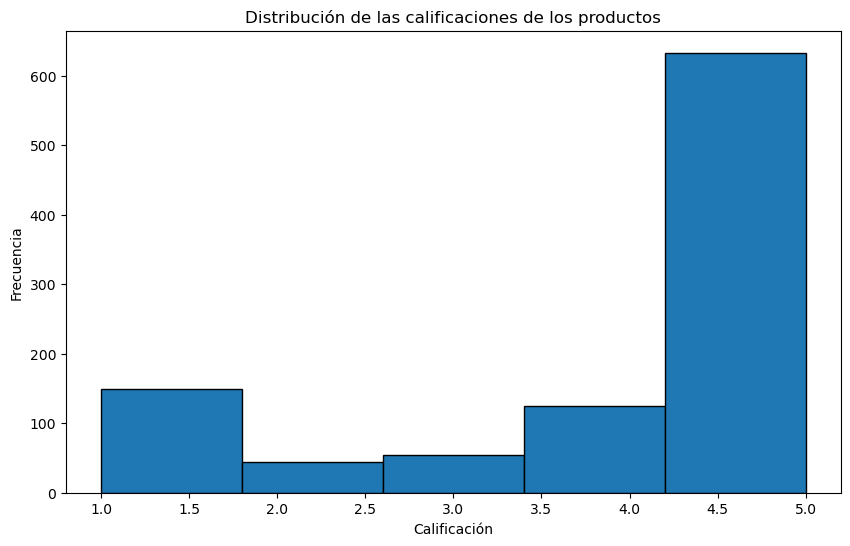

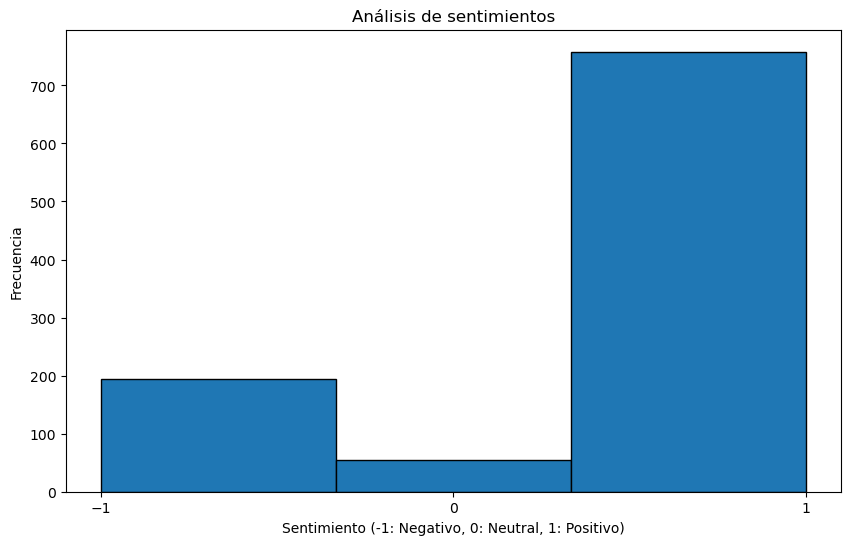

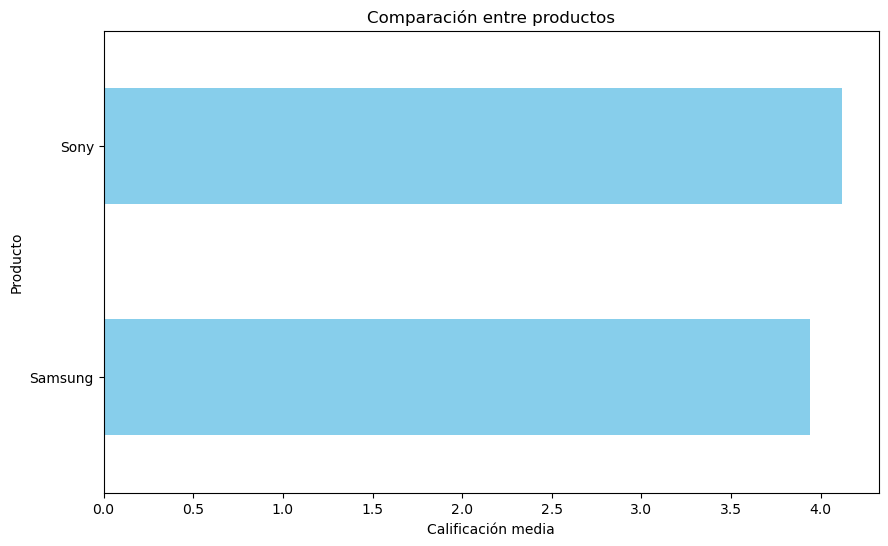

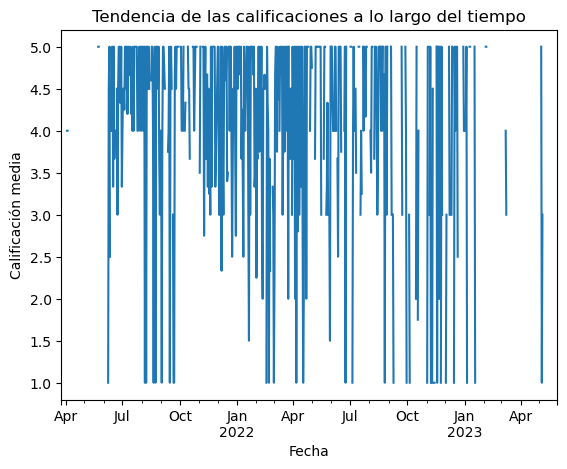

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import datetime

# Suponiendo que tu archivo CSV se llama 'Datos_Actividad3.csv'
df = pd.read_csv(r'C:\Users\Oscar\Downloads\Datos_Actividad3.csv')

# Asegúrate de que las columnas del DataFrame corresponden a tus datos. 
# Por ejemplo, estas podrían ser las columnas: 'ProductCode', 'Rating', 'ReviewText', 'Date'
# Si las columnas tienen nombres diferentes, cambia los nombres en el siguiente código.

# 1. Distribución de las calificaciones de los productos
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=5, edgecolor='black')  # Cambiado 'rating' por 'Rating'
plt.title('Distribución de las calificaciones de los productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

# 2. Análisis de sentimientos
# Aquí puedes utilizar un modelo de análisis de sentimientos en las revisiones para obtener un sentimiento más preciso. 
# Por ahora, usaremos una simplificación considerando la calificación como indicador del sentimiento.
sentiment = df['Rating'].apply(lambda rating : +1 if rating > 3 else 0 if rating == 3 else -1) # Cambiado 'rating' por 'Rating'
plt.figure(figsize=(10, 6))
plt.hist(sentiment, bins=3, edgecolor='black')
plt.title('Análisis de sentimientos')
plt.xlabel('Sentimiento (-1: Negativo, 0: Neutral, 1: Positivo)')
plt.ylabel('Frecuencia')
plt.xticks([-1, 0, 1])
plt.show()

# 3. Comparación entre productos
product_ratings = df.groupby('ProductCode')['Rating'].mean().sort_values() # Cambiado 'product' por 'ProductCode' y 'rating' por 'Rating'
plt.figure(figsize=(10, 6))
product_ratings.plot(kind='barh', color='skyblue')
plt.title('Comparación entre productos')
plt.xlabel('Calificación media')
plt.ylabel('Producto')
plt.show()

# 4. Tendencias a lo largo del tiempo
df['Date'] = pd.to_datetime(df['Date']) # Cambiado 'date' por 'Date'
df.set_index('Date', inplace=True) # Cambiado 'date' por 'Date'
df['Rating'].resample('D').mean().plot() # Cambiado 'rating' por 'Rating'
plt.title('Tendencia de las calificaciones a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Calificación media')
plt.show()

